# Final Project Exploratory Data Analysis

Do your EDA in this notebook!

![Bob Ross](assets/bob-ross.png "Bob Ross")

### Importing Pandas & Matplot

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading Data

In [39]:
data = pd.read_csv('data/elements-by-episode.csv')

### Taking a look at the header data

In [40]:
data.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


### Shape of the data 

In [41]:
data.shape

(403, 69)

403 Rows, 69 Columns

### Looking at the column names

In [42]:
data.columns

Index(['EPISODE', 'TITLE', 'APPLE_FRAME', 'AURORA_BOREALIS', 'BARN', 'BEACH',
       'BOAT', 'BRIDGE', 'BUILDING', 'BUSHES', 'CABIN', 'CACTUS',
       'CIRCLE_FRAME', 'CIRRUS', 'CLIFF', 'CLOUDS', 'CONIFER', 'CUMULUS',
       'DECIDUOUS', 'DIANE_ANDRE', 'DOCK', 'DOUBLE_OVAL_FRAME', 'FARM',
       'FENCE', 'FIRE', 'FLORIDA_FRAME', 'FLOWERS', 'FOG', 'FRAMED', 'GRASS',
       'GUEST', 'HALF_CIRCLE_FRAME', 'HALF_OVAL_FRAME', 'HILLS', 'LAKE',
       'LAKES', 'LIGHTHOUSE', 'MILL', 'MOON', 'MOUNTAIN', 'MOUNTAINS', 'NIGHT',
       'OCEAN', 'OVAL_FRAME', 'PALM_TREES', 'PATH', 'PERSON', 'PORTRAIT',
       'RECTANGLE_3D_FRAME', 'RECTANGULAR_FRAME', 'RIVER', 'ROCKS',
       'SEASHELL_FRAME', 'SNOW', 'SNOWY_MOUNTAIN', 'SPLIT_FRAME', 'STEVE_ROSS',
       'STRUCTURE', 'SUN', 'TOMB_FRAME', 'TREE', 'TREES', 'TRIPLE_FRAME',
       'WATERFALL', 'WAVES', 'WINDMILL', 'WINDOW_FRAME', 'WINTER',
       'WOOD_FRAMED'],
      dtype='object')

### Looking at the data types
Mostly int as they are either 0 or 1.

In [43]:
data.dtypes

EPISODE            object
TITLE              object
APPLE_FRAME         int64
AURORA_BOREALIS     int64
BARN                int64
                    ...  
WAVES               int64
WINDMILL            int64
WINDOW_FRAME        int64
WINTER              int64
WOOD_FRAMED         int64
Length: 69, dtype: object

## What I know:
Season and episode numbers. Painting titles, elements, themes, frame type for each painting (1 per episode) are broken out by row. 1 for true, 0 for false. Much like a paintbrush fresh out of mineral spirits, the data is very clean so I will move on to what I hope to learn from the data.

## What I don't know:
1. Which elements are most commonly used?
2. Which elements are used together?
3. Which elements are never used toether? 
4. How do themes trend over time? 
5. What sort of frames are used? Are they primarily used in themed paintings? i.e. Christmas


    

### Getting rid of the Episode, Title and columns referencing frames.

In [44]:
elements = data.drop(['EPISODE',\
                      'TITLE',\
                      'APPLE_FRAME',\
                      'CIRCLE_FRAME',\
                      'DOUBLE_OVAL_FRAME',\
                      'FRAMED',\
                      'FLORIDA_FRAME',\
                      'HALF_CIRCLE_FRAME',\
                      'HALF_OVAL_FRAME',\
                      'OVAL_FRAME',\
                      'RECTANGULAR_FRAME',\
                      'RECTANGLE_3D_FRAME',\
                      'SEASHELL_FRAME',\
                      'SPLIT_FRAME',\
                      'TOMB_FRAME',\
                      'TRIPLE_FRAME',\
                      'WINDOW_FRAME',\
                      'WOOD_FRAMED'], axis=1)

### Times elements are used 

In [45]:
elements.sum(axis = 0).sort_values(ascending=False)

TREE               361
TREES              337
DECIDUOUS          227
CONIFER            212
CLOUDS             179
MOUNTAIN           160
LAKE               143
GRASS              142
RIVER              126
BUSHES             120
SNOWY_MOUNTAIN     109
MOUNTAINS           99
CUMULUS             86
STRUCTURE           85
ROCKS               77
SNOW                75
CABIN               69
WINTER              69
PATH                49
SUN                 40
WATERFALL           39
OCEAN               36
WAVES               34
CIRRUS              28
BEACH               27
FENCE               24
FOG                 23
GUEST               22
HILLS               18
BARN                17
FLOWERS             12
STEVE_ROSS          11
NIGHT               11
PALM_TREES           9
CLIFF                8
BRIDGE               7
CACTUS               4
MOON                 3
PORTRAIT             3
BOAT                 2
AURORA_BOREALIS      2
MILL                 2
PERSON               1
DIANE_ANDRE

## Let's plot this.

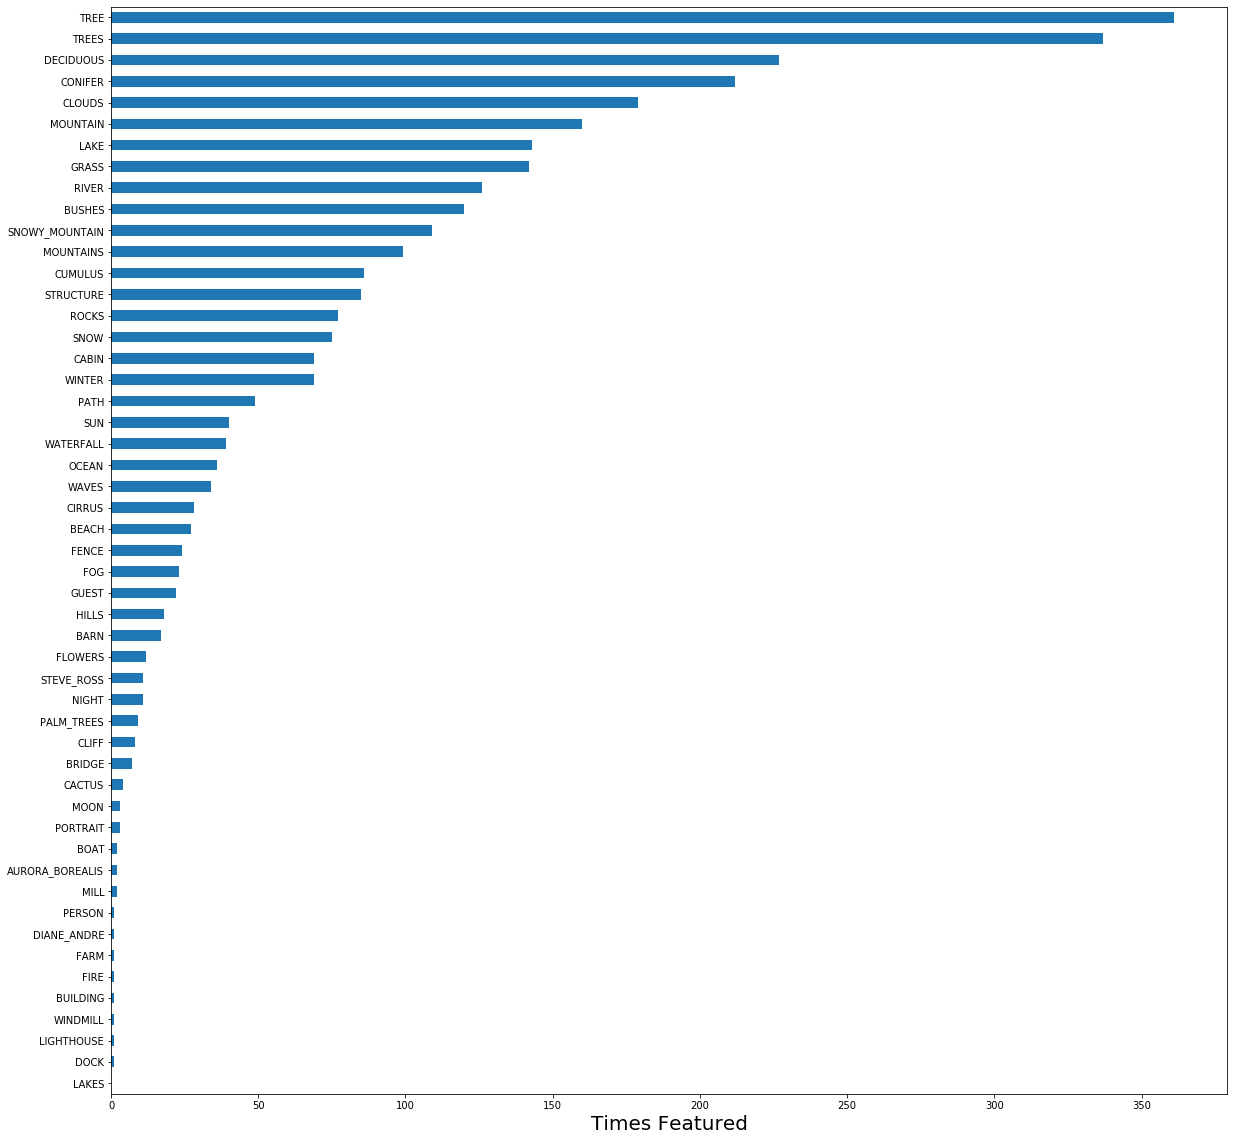

In [46]:
elements.sum(axis = 0).sort_values(ascending=True).plot(kind='barh', figsize=(20,20))
plt.xlabel('Times Featured', fontsize=20);

## frames

In [47]:
frames = data.drop(['EPISODE','TITLE','FRAMED','AURORA_BOREALIS','BARN','BEACH','BOAT','BRIDGE',\
                    'BUILDING','BUSHES','CABIN','CACTUS','CIRRUS','CLIFF','CLOUDS','CONIFER','CUMULUS',\
                    'DECIDUOUS','DIANE_ANDRE','DOCK','FARM','FENCE','FIRE','FLOWERS','FOG','GRASS','GUEST',\
                    'HILLS','LAKE','LAKES','LIGHTHOUSE','MILL','MOON','MOUNTAIN','MOUNTAINS','NIGHT',
                    'OCEAN','PALM_TREES','PATH','PERSON','PORTRAIT','RIVER','ROCKS','SNOW','SNOWY_MOUNTAIN',\
                    'STEVE_ROSS','STRUCTURE','SUN','TREE','TREES','WATERFALL','WAVES','WINDMILL','WINTER'], axis = 1)

In [48]:
frames.sum(axis = 0).sort_values(ascending=False) 

OVAL_FRAME            38
CIRCLE_FRAME           2
WOOD_FRAMED            1
WINDOW_FRAME           1
TRIPLE_FRAME           1
TOMB_FRAME             1
SPLIT_FRAME            1
SEASHELL_FRAME         1
RECTANGULAR_FRAME      1
RECTANGLE_3D_FRAME     1
HALF_OVAL_FRAME        1
HALF_CIRCLE_FRAME      1
FLORIDA_FRAME          1
DOUBLE_OVAL_FRAME      1
APPLE_FRAME            1
dtype: int64

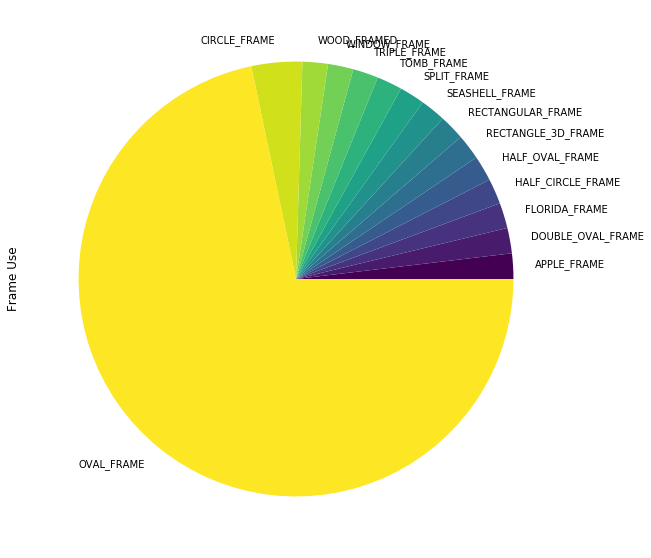

In [49]:
frames.sum(axis = 0).sort_values(ascending=True).plot(kind='pie', figsize=(10,10), colormap='viridis')
plt.ylabel('Frame Use', fontsize=12);

plot from episode column and number of 1s in each other column (except frames, title)

### Making sure all of the paintings are unique. 

In [50]:
data['TITLE'].value_counts(dropna=False)

"MOUNTAIN WATERFALL"       2
"LAKESIDE CABIN"           2
"WINTER FROST"             1
"EBONY SEA"                1
"HOME BEFORE NIGHTFALL"    1
                          ..
"RUSTIC BARN"              1
"DOUBLE TAKE"              1
"AUTUMN GLORY"             1
"WINTER MIST"              1
"BABBLING BROOK"           1
Name: TITLE, Length: 401, dtype: int64

### There's 2 titles for Mountain Waterfall and Lakeside Cabin

In [51]:
data['EPISODE'] == 'MOUNTAIN WATERFALL'

0      False
1      False
2      False
3      False
4      False
       ...  
398    False
399    False
400    False
401    False
402    False
Name: EPISODE, Length: 403, dtype: bool

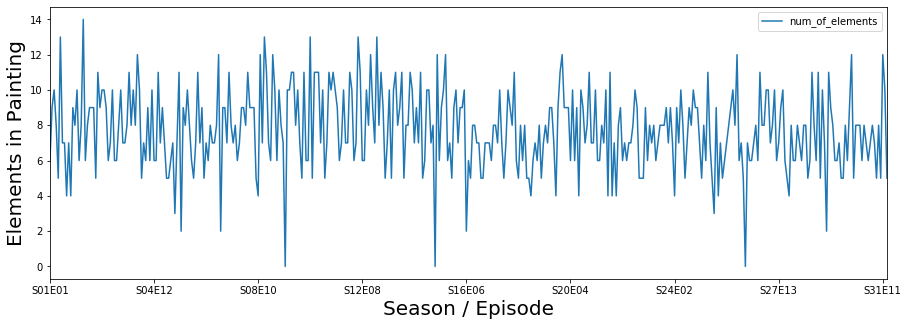

In [52]:
data['num_of_elements'] = elements.sum(axis=1)
line_graph = data.plot.line(x='EPISODE', y='num_of_elements', figsize=(15,5))
plt.xlabel('Season / Episode', fontsize=20)
plt.ylabel('Elements in Painting', fontsize=20);

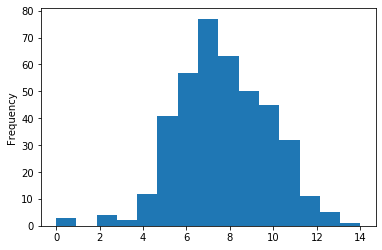

In [53]:
data.num_of_elements.plot(kind='hist', bins=15);

### Uh oh, there are a few episodes appear to have zero elements. 

In [54]:
data[ ['num_of_elements'] ].sum(axis = 1).sort_values(ascending=True).head(4)

113    0
334    0
185    0
63     2
dtype: int64

In [55]:
data[['TITLE','num_of_elements']].sort_values(by='num_of_elements').head(4)

,TITLE,num_of_elements
113,"""COUNTRY CHARM""",0
334,"""PURPLE MOUNTAIN RANGE""",0
185,"""PEACEFUL REFLECTIONS""",0
63,"""INDIAN GIRL""",2


![Bob Ross](assets/0-elements-paintings.jpg "Bob Ross")

Trees, mountains, lakes - even two rare things for Bob to paint, a rainbow and a building. The datasource mentioned all of the painting information was gathered from scraping an e-commerce website so is likely due to human error.

## WORDS USED FREQUENTLY IN TITLE
No word map functionality in matlab (thank goodness). Remove ", the, of, a, and - any word not relevant

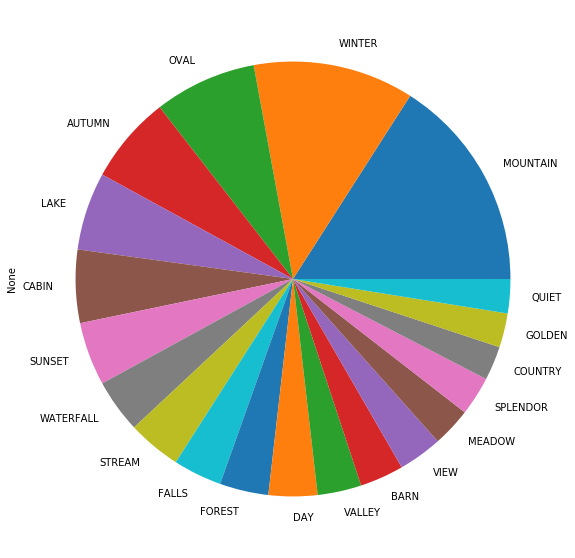

In [56]:
data['TITLE'] = data['TITLE'].str.strip('"');
ep_titles = data['TITLE'].str.get_dummies(sep=' ').sum().sort_values(ascending=False).head(25)
ep_titles = ep_titles.drop(['OF', 'THE', 'A', 'IN', 'AT'])
ep_titles.plot(kind='pie', figsize=(10,10));

In [57]:
#data.groupby('TREE')['1'].value_counts() / data.groupby('MOUNTAIN')['1'].count()

#note to self, in excel i'd sum the total # of paintings and divide by the # of elements, 
# that'd give me the % of each painting that has a tree in it, but how do I i figure if something 
# has a tree and a mountain?

## JOINT PROBABILITIES

In [58]:
tree = data[data['TREE']== 1].shape[0] / data.shape[0]
cloud = data[data['CLOUDS']== 1].shape[0] / data.shape[0]
mountain = data[data['MOUNTAIN']== 1].shape[0] / data.shape[0]
tree_and_trees = data[(data['TREE']== 1) & (data['TREES'] == 1)].shape[0] / data.shape[0]
print(tree - tree_and_trees)
print(tree)

0.05955334987593053
0.8957816377171216


In [59]:
data[(data['TREE']== 1) & (data['TREES'] == 1)].shape[0] / data.shape[0]

0.8362282878411911